In [29]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score

In [30]:
d=load_diabetes()

In [31]:
d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [32]:
df = pd.DataFrame(data=d.data, columns=d.feature_names)

In [33]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [34]:
type(d)

sklearn.utils._bunch.Bunch

In [35]:
df['target']=d['target']

In [36]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [37]:
d['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [38]:
d['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [39]:
d['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [40]:
df['diabetes']=d.target
df.head(2)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,75.0


In [79]:
x=df.drop(columns=['diabetes'])
x=x.drop(columns=['target'])
y=df['diabetes']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [82]:
print(x_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [83]:
print(x_test.shape,y_test.shape)

(89, 10) (89,)


In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
lr_coeff=lr.coef_

In [85]:
lr.intercept_

151.4300932966009

In [86]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.4384316213369279

In [87]:
y_pred_train=lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.533228363691215

In [88]:
lr_error=mse(y_train,y_pred_train)

In [99]:
r=Ridge(alpha=1)
r.fit(x_train,y_train)

Ridge(alpha=1)

In [100]:
y_pred_train1=r.predict(x_train)
r2_score(y_train,y_pred_train1)

0.4510430970203785

In [101]:
r_error=mse(y_train,y_pred_train1)


In [102]:
ridge_coeff=r.coef_

In [103]:
print(lr_coeff)
print("error is linear regression:",lr_error)
print(' - '*90)
print(ridge_coeff)
print("error in ridge:",r_error)

[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]
error is linear regression: 2835.0372206252887
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
[  30.19981099  -80.82971861  290.03134528  186.97053338   10.52007866
  -21.99921707 -151.22058789  116.91058436  241.96391279  110.24829294]
error in ridge: 3334.206989897002


[  30.19981099  -80.82971861  290.03134528  186.97053338   10.52007866
  -21.99921707 -151.22058789  116.91058436  241.96391279  110.24829294]
152.05358265576848
[  34.56558284  -38.39047988  205.71514873  137.86232842   22.0228002
    0.35538563 -115.19533769   99.42420543  177.00097889   95.22882026]
152.36440799698383
[ 32.78938031 -21.85191682 161.06685861 110.33813391  24.28211424
   8.11109156 -93.70462137  85.41837404 141.5230249   81.56602451]
152.55027525229903
[  5.38896051   0.45840894  16.87400455  12.39477967   5.27545307
   3.88107313 -11.00811955  11.70678848  16.02979394  10.79988878]
153.2778907082602
[ 18.46583843  -1.74032999  65.76348345  47.21871314  16.81244937
  10.98027077 -41.36792574  41.9418211   60.80332019  39.23435446]
153.0078048506486
[ 13.75960515  -0.23024072  46.45317317  33.66086194  12.91773799
   8.91007183 -29.65540626  30.65811209  43.41306056  28.52500765]
153.11155021785484
[ 10.94234248   0.23688003  35.93420785  26.16663391  10.43385714
   7.

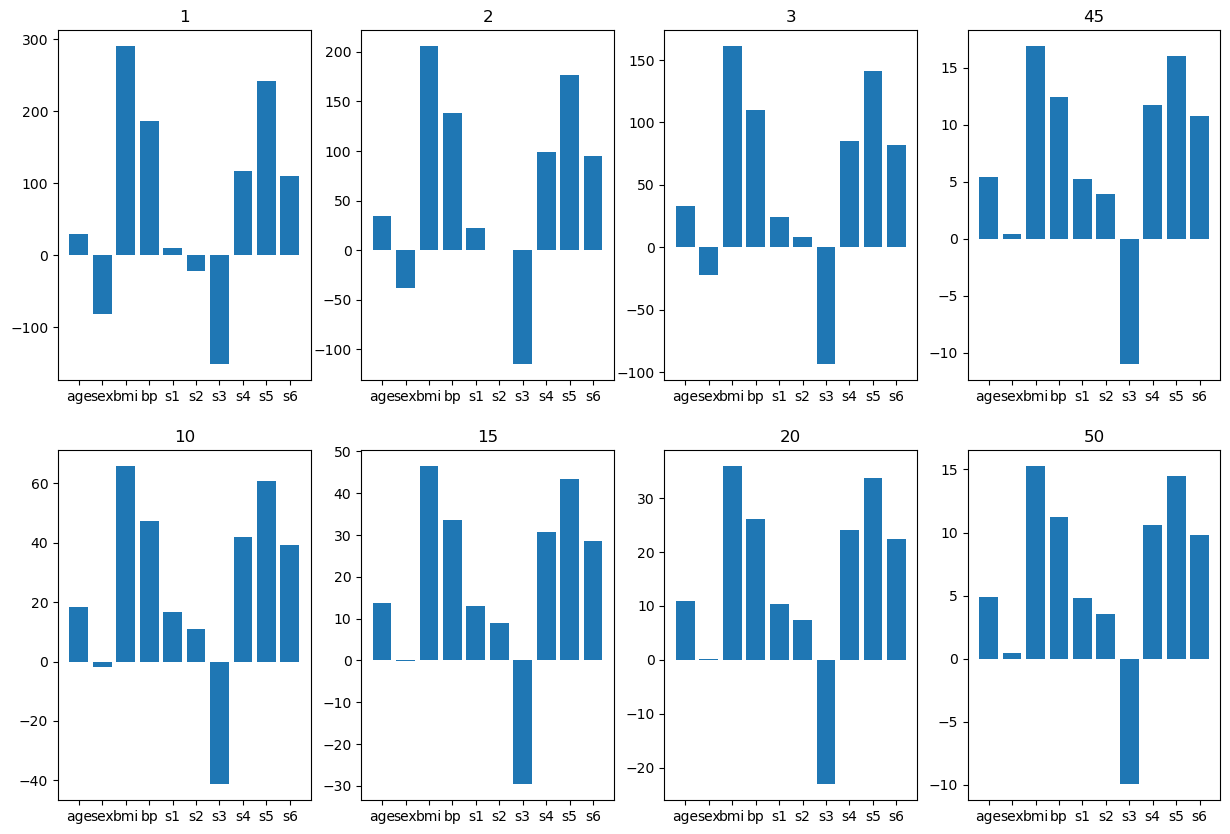

In [108]:
a=[1,2,3,45,10,15,20,50]
errors=[]
pos=1
d={}
plt.figure(figsize=(15,10))
for i in a:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    print(r.coef_)
    print(r.intercept_)
    y_pred=r.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred))
    errors.append(rmse)
    d[i]=r.coef_
    plt.subplot(2,4,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos=pos+1
print("errors:",errors)

errors: [55.0659448252393, 55.19383455467866, 56.383093243456955, 60.21106516143419, 70.4635981228757, 73.26046048581938, 73.26046048581938, 73.26046048581938]


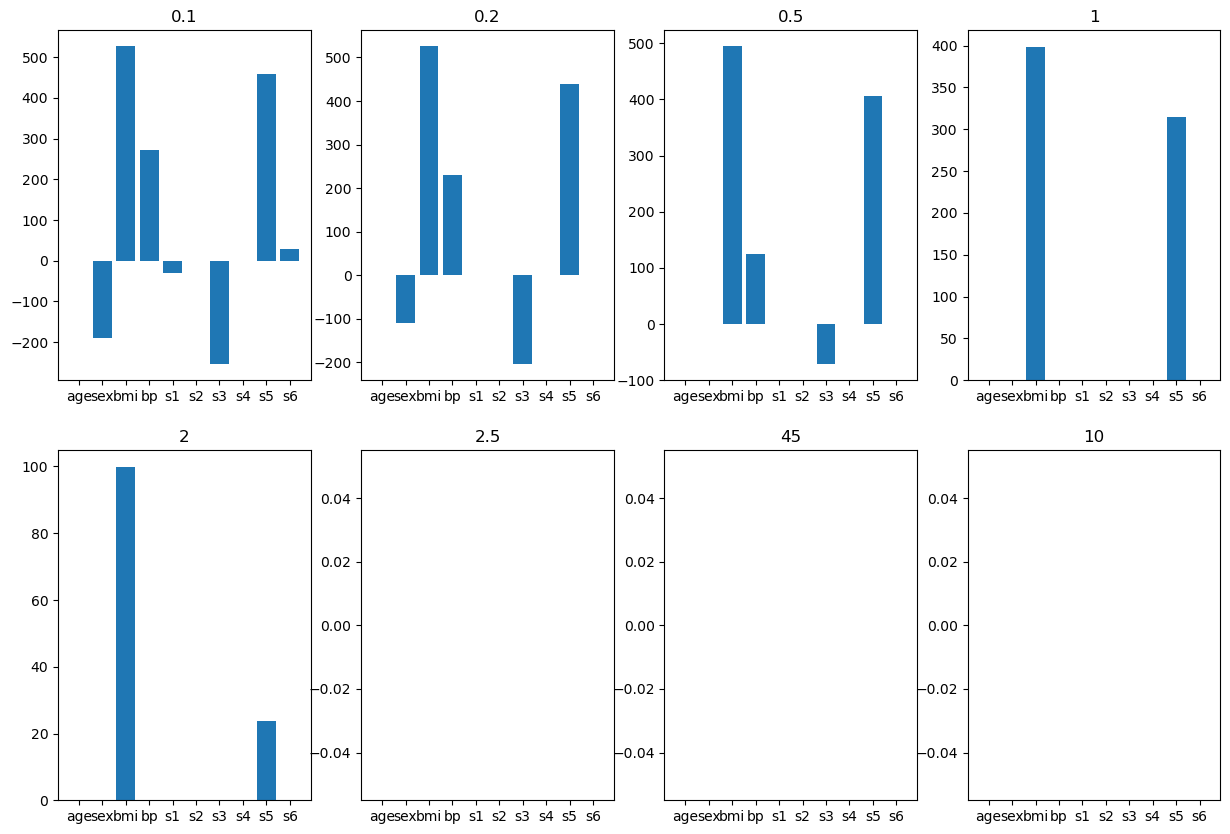

In [111]:
a=[0.1,0.2,0.5,1,2,2.5,45,10,]
errors=[]
pos=1
d={}
plt.figure(figsize=(15,10))
for i in a:
    r=Lasso(alpha=i)
    r.fit(x_train,y_train)
    # print(r.coef_)
    # print(r.intercept_)
    y_pred=r.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred))
    errors.append(rmse)
    d[i]=r.coef_
    plt.subplot(2,4,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos=pos+1
print("errors:",errors)